# QUESTION 5:

Apply simple K-means algorithm for clustering any dataset. Compare the performance of clusters by varying the algorithm parameters. For a given set of parameters, plot a line graph depicting MSE obtained after each iteration.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

wine = load_wine()
X = wine.data
# Step 1: Standardize (zero mean, unit variance)
X_scaled = StandardScaler().fit_transform(X)
# Step 2: Normalize (scale to [0, 1])
X_scaled = MinMaxScaler().fit_transform(X_scaled)
X_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [ ]:
k = 4
max_iters = 10
mse_list = []
initial_kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1, n_init=1, random_state=42)
initial_kmeans.fit(X_scaled)
centroids = initial_kmeans.cluster_centers_
for i in range(max_iters):
    kmeans = KMeans(n_clusters=k, init=centroids, max_iter=1, n_init=1, random_state=42)
    kmeans.fit(X_scaled)
    centroids = kmeans.cluster_centers_
    mse_list.append(kmeans.inertia_)
mse_list

[45.44235489674037,
 44.958693759125126,
 44.90194103978226,
 44.88760458085282,
 44.88760458085282,
 44.88760458085282,
 44.88760458085282,
 44.88760458085282,
 44.88760458085282,
 44.88760458085282]

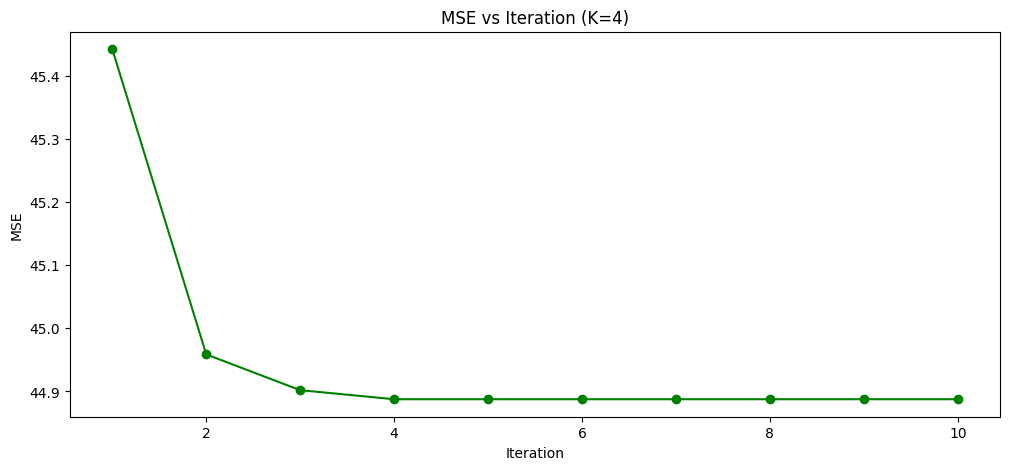

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, max_iters + 1), mse_list, marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iteration (K=4)')
plt.show()

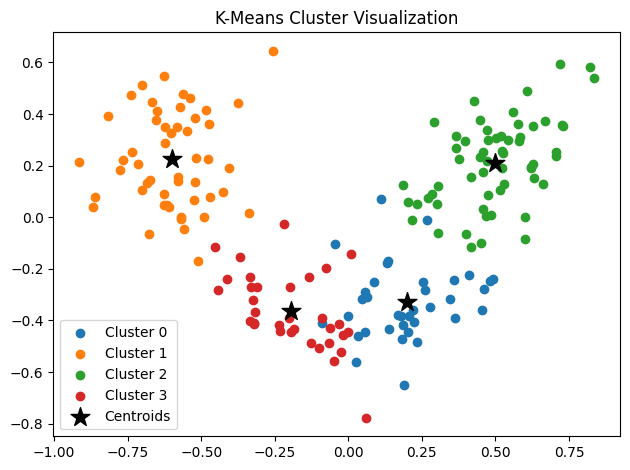

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
clusters = kmeans.predict(X_scaled)
for cluster in range(k):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', color='black', s=200, label='Centroids')
plt.title('K-Means Cluster Visualization')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

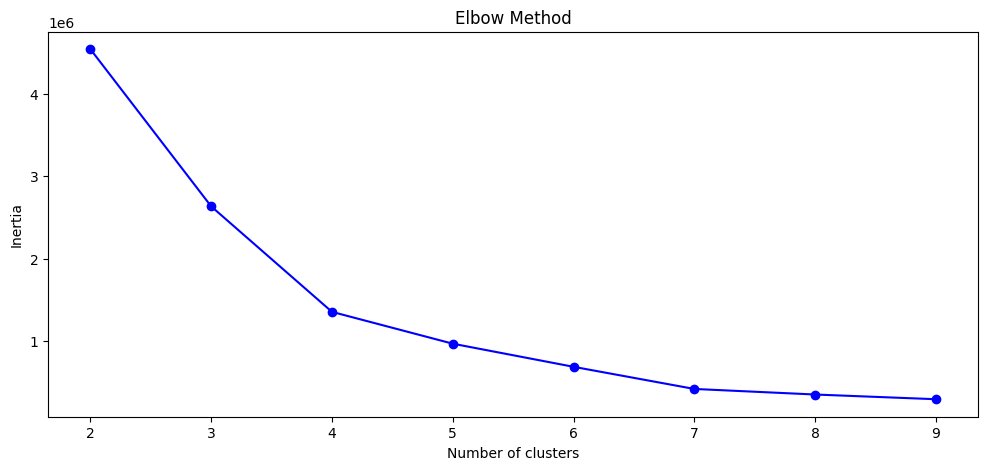

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

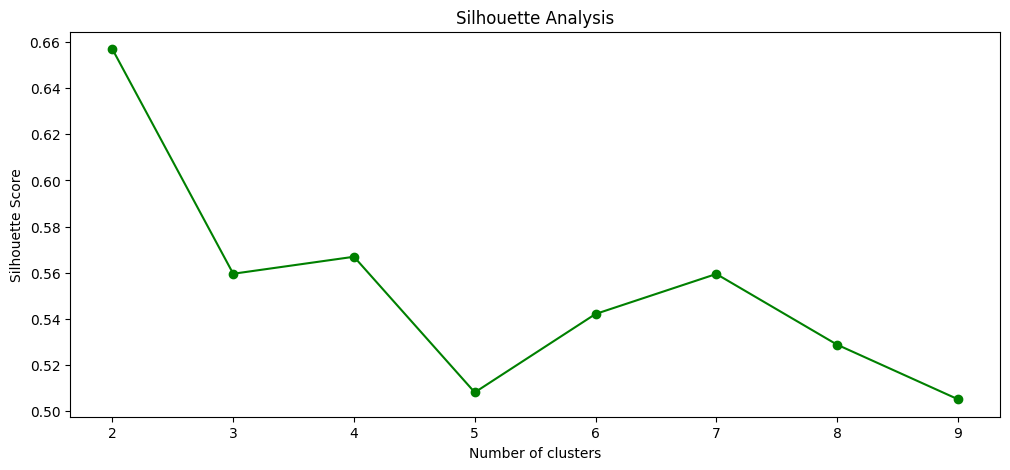

In [ ]:
# Plot Silhouette scores
plt.figure(figsize=(12, 5))
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()